<a href="https://colab.research.google.com/github/NasrunSR/Assignment2_ML_p1/blob/main/ex2P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Machine Learning Exercise 2 Part 1
Linear Regression

In [1]:
## Machine Learning - Exercise 2: Linear Regression

#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions
#  in this exericse:
#
#     warmUpExercise
#     plotData
#     PART#01
#         gradientDescent
#         computeCost
#         Visualization
#         LearningRate
#     PART#02
#         OPTIMIZATION FUNCTIONS
#         LEARNING RATE
#
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
# X refers to the population size in 10,000s
# Y refers to the profit in $10,000s


#Write the code below every comment
import numpy as np
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/ex2data1.txt"

Mounted at /content/drive/


Task 1: Basic Python Function

In [2]:
##==================== Task 1: Basic Function ====================
#Complete warmUpExercise

# 5x5 matrix with 1's on main diagnol

import numpy as np
def iden(a):                   # function definition
 ########### YOUR CODE HERE ###########
 # Creating an a x a identity matrix using NumPy
  b = np.eye(a)


 ######################################
  return b

print("Matrix a : \n", iden(5))   # function call

Matrix a : 
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


Task 2: Plotting Data

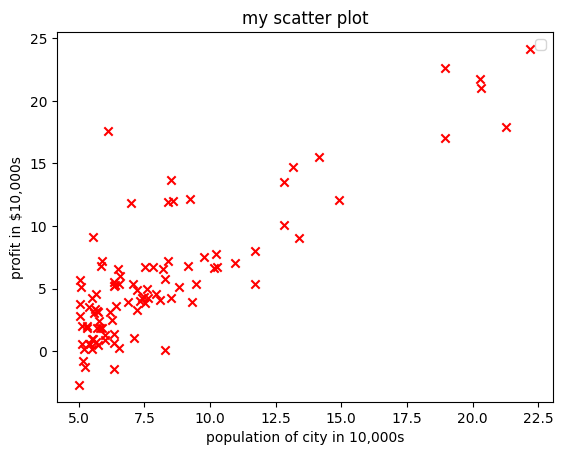

In [3]:
## ======================= Task 2: Plotting =======================

import matplotlib.pyplot as plt

# used for manipulating directory paths
import os


# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]


# Plot Data
# Note: You have to complete the code in plotData function

def plotdata(a,b):                       # function def
  # plotting points as a scatter plot
 ########### YOUR CODE HERE ###########
  plt.scatter(a, b, marker='x', c='red')

  # Adding labels to the plot
  plt.xlabel('population of city in 10,000s')
  plt.ylabel('profit in $10,000s')
  plt.title('my scatter plot')

  # Displaying the legend
  plt.legend()



 ######################################
  return

plotdata(X,Y)  # function Call
plt.show()


DO NOT run this block more than one time

In [4]:
m = Y.size  # number of training examples
X = np.stack([np.ones(m), X], axis=1) # it used to convert X in to (97x2), first colum is all ones to get  where theta is (2x1)    "theta[0]+theta[1]*X"
print(X.shape)

(97, 2)


Computing cost

In [5]:
## ======================= Task 3: Computing Cost =======================

import numpy as np
from numpy import *

def computeCost(X,y , theta):
  m = y.size
  J = 0    # You need to return this parameter correctly
  h = np.dot(X, theta)
  ############ YOUR COST FUNCTION J HERE ###########
  # Cost function J
  J = (1 / (2 * m)) * np.sum((h - y) ** 2)

 ###################################################
  return J

J = computeCost(X, Y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed =', J)
print('Expected cost value (approximately) 32.07\n')

With theta = [0, 0] 
Cost computed = 32.072733877455676
Expected cost value (approximately) 32.07



Gradient Descent

[-3.63029144  1.16636235]


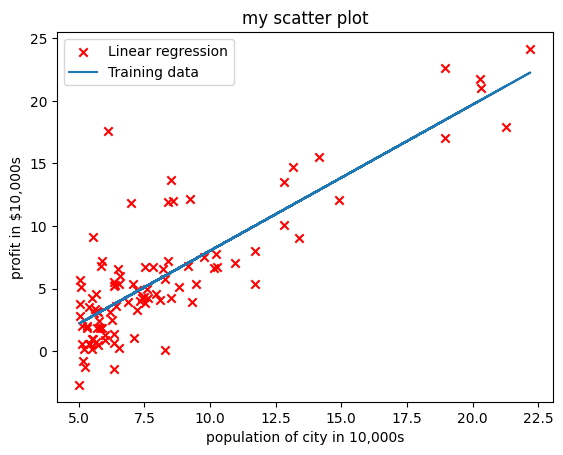

In [6]:
## ======================= Task 4: Gradient Descent =======================

def gradientDescent(X, y, theta, alpha, num_iters):
  m = y.shape[0]
  theta = theta.copy()
  J_history = []

  for i in range(num_iters):
    ########### YOUR GRADIENT DESCENT "theta" HERE ###########
    # Hypothesis function
    h = np.dot(X, theta)

    # Update rule for theta
    theta = theta - (alpha / m) * np.dot(X.T, (h - y))


    ######################################################
    J_history.append(computeCost(X, y, theta))
  return theta, J_history


# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,Y, theta, alpha, iterations)
print(theta)
# plot the linear fit
plotdata(X[:, 1],Y)
plt.plot(X[:, 1], np.dot(X, theta))

plt.legend([ 'Linear regression','Training data',]);


Fitting 2nd order polynomial

Producing 2D plots and contour Plots

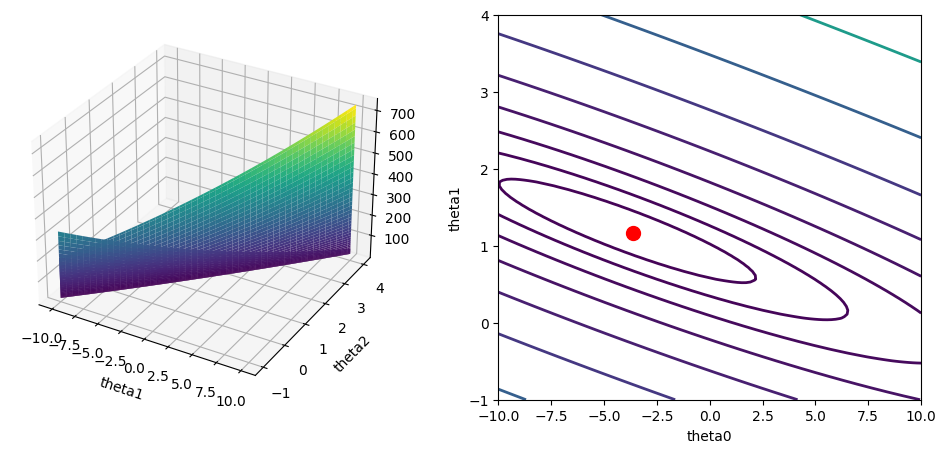

In [7]:
# ==================================NO NEED CHANGE CODE IN THIS CELL
# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# grid over which we will calculate J COST
t0 = np.linspace(-10, 10, 100)
t1 = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((t0.shape[0], t1.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(t0):
    for j, theta1 in enumerate(t1):
        J_vals[i, j] = computeCost(X,Y, [theta0, theta1])

# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(t0, t1, J_vals, cmap='viridis')
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')


# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax2 = plt.subplot(122)
ax2.contour(t0, t1, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
ax2.set_xlabel('theta0')
ax2.set_ylabel('theta1')
ax2.plot(theta[0], theta[1], 'ro', ms=10, lw=2)

pass

Feature Normalization

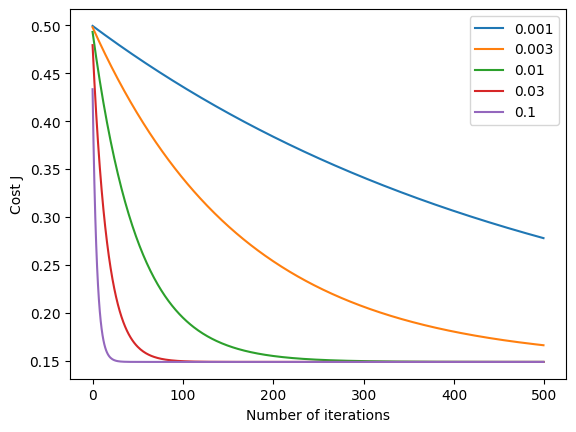

In [47]:
## ======================= Task 5: Feature Normalization =======================

# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]


def  featureNormalize(X):

########### YOUR CODE HERE ###########
  mu = np.mean(X)
  sigma = np.std(X)
  X_norm = (X - mu) / sigma

######################################

  return X_norm, mu, sigma

X, mu, sigma = featureNormalize(X)
Y, mu, sigma = featureNormalize(Y)

X = np.stack([np.ones(m), X], axis=1)

# CHANGE THE VALUES of ALPHAS, 5 VALUES OF ALPHA
#PLOT LEARNING RATES FOR FOLLOWING FOR ALPHAS, NO NEED TO CHANGE THE CODE ONLY REQUIRE "gradientDescent" TO BE DEFINED CORRECTLY


# some gradient descent settings
iterations = 500
alpha = [0.001, 0.003, 0.01, 0.03, 0.1] #--------------ENTER YOUR LEARNING RATES
costs=[]

for i in range(5):
  theta = np.zeros(2)
  theta, J_history = gradientDescent(X ,Y, theta, alpha[i], iterations)
          # initialize fitting parameters
  costs.append(J_history)
# Plot the convergence graph

for i in range(5):
  plt.plot(np.arange(len(costs[i])), costs[i], label=str(alpha[i]))
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.legend()